In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
import re
from datetime import time
from datetime import datetime
import os

from astropy.time import Time
from astropy.time import TimeDelta

from sunpy import timeseries as ts
from sunpy.net import attrs as a

# os.environ['HOME'] = 'D:\MastersProj\CHIANTI'
# os.environ['XUVTOP'] = 'D:\MastersProj\CHIANTI'
# import ChiantiPy.core as ch

import pandas as pd

import goesxrs_temp as gtem #from Ian's functions
import Onsets_temp as onsets

import warnings #Need to remove for future
warnings.filterwarnings("ignore", module="sunpy.timeseries.timeseriesbase")


# Just setup plot fonts
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular", 'axes.linewidth' :2})

## Temperature Responses

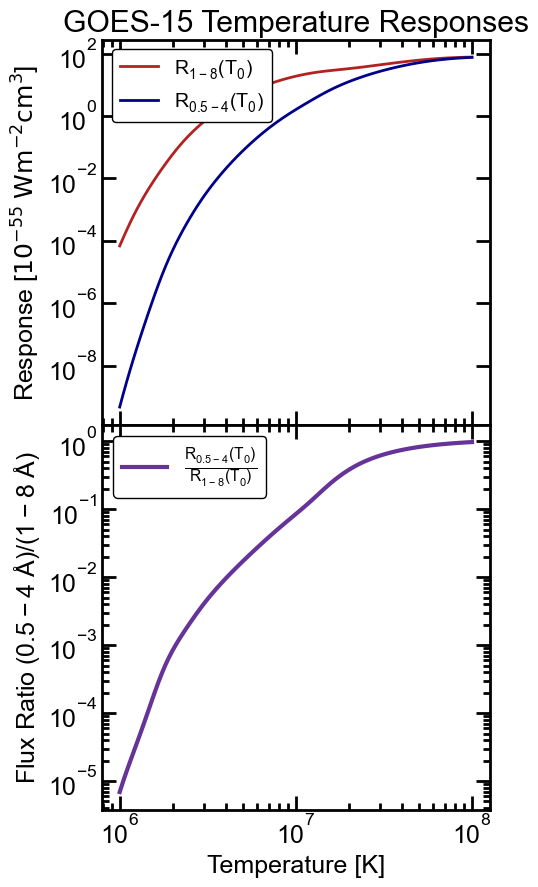

In [2]:
sat = 15
resps_old, resptmk_old = gtem.get_resps(sat=sat,old_ver=True)
resps, resptmk = gtem.get_resps(sat=sat)

# Plot them to see what they look like:
fig= plt.figure(figsize=(5,10))
plt.subplots_adjust(wspace = 0, hspace = 0)

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title("GOES-15 Temperature Responses")
ax1.plot(1e6*resptmk,resps[:,0],marker=None,color='firebrick',lw=2,label='$R_{1-8}(T_{0})$')
ax1.plot(1e6*resptmk,resps[:,1],marker=None,color='darkblue',lw=2,label='$R_{0.5-4}(T_{0})$')
#ax1.axvspan(5e6, 5e7, color = 'black', alpha = 0.2)
ax1.set_ylabel("Response [$\mathrm{10^{-55}\;Wm^{-2}cm^{3}}$]")
ax1.set_xlabel("Temperature [K]")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax1.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax1.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax1.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax1.legend(fancybox = True,loc = "upper left", fontsize = 14, framealpha = 1, edgecolor = 'black')

#ax1.grid()
#plt.legend(fancybox = True,title='XRS{:.0f}'.format(sat))

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(1e6*resptmk,resps[:,1]/resps[:,0],marker=None,color='rebeccapurple',lw=3, label = r'$\frac{R_{0.5-4}(T_{0})}{R_{1-8}(T_{0})}$')
#ax2.axvspan(5e6, 5e7, color = 'black', alpha = 0.2)
ax2.set_ylabel("Flux Ratio $(0.5-4\;\AA)$/$(1-8\;\AA)$")
ax2.set_xlabel("Temperature [K]")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax2.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax2.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax2.legend(fancybox = True,loc = "upper left", fontsize = 16, framealpha = 1, edgecolor = 'black')

#plt.savefig("Presentation_Graphs/TResponses.pdf", bbox_inches = 'tight',pad_inches = 0)
plt.show()


## Instrument Responses

In [3]:
wavelengths_short = []
response_short = []
wavelengths_long = []
response_long = []

with open('goes_13_14_15_response_functions_XRS_A.txt', 'r') as f:
    for line in f.readlines()[9:]:
        columns = line.strip().split()  # split the line into columns
        wavelengths_short.append(float(columns[0].strip("'"))*10)  # append column 0 to the col0 array
        response_short.append(float(columns[3].strip("'")))  # append column 3 to the col3 array


with open('goes_13_14_15_response_functions_XRS_B.txt', 'r') as f:
    for line in f.readlines()[9:]:
        columns = line.strip().split()  # split the line into columns
        wavelengths_long.append(float(columns[0].strip("'"))*10)  # append column 0 to the col0 array
        response_long.append(float(columns[3].strip("'")))  # append column 3 to the col3 array

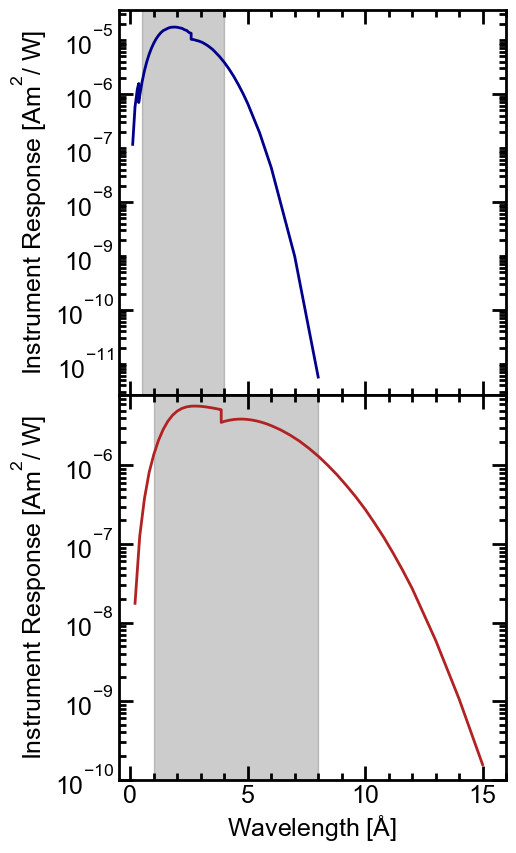

In [4]:
sat = 15
resps_old, resptmk_old = gtem.get_resps(sat=sat,old_ver=True)
resps, resptmk = gtem.get_resps(sat=sat)

# Plot them to see what they look like:
fig= plt.figure(figsize=(5,10))
plt.subplots_adjust(wspace = 0, hspace = 0)

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(wavelengths_short, response_short,marker=None,color='darkblue',lw=2,label= '$R_{1-8}(T_{0})$')
ax1.axvspan(0.5,4, color = 'black', alpha = 0.2)
ax1.set_ylabel("Instrument Response [$A m^{2} / \;W$]")
ax1.set_yscale("log")
ax1.set_xlim([-0.5,16])
ax1.xaxis.set_ticklabels([])
ax1.xaxis.set_major_locator(ticker.AutoLocator())
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_major_locator(ticker.LogLocator())
ax1.yaxis.set_minor_locator(ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax1.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax1.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax1.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax1.tick_params(which='minor', size=5, width=2, direction='in', right='on')


ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(wavelengths_long,response_long, marker=None,color='firebrick',lw=2, label = r'$\frac{R_{0.5-4}(T_{0})}{R_{1-8}(T_{0})}$')
ax2.axvspan(1,8, color = 'black', alpha = 0.2)
ax2.set_xlabel("Wavelength [$\AA$]")
ax2.set_ylabel("Instrument Response [$A m^{2} / \;W$]")
ax2.set_yscale("log")
ax2.set_xlim([-0.5,16])
ax2.set_ylim([1e-10,8e-6])
ax2.xaxis.set_major_locator(ticker.AutoLocator())
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_major_locator(ticker.LogLocator())
ax2.yaxis.set_minor_locator(ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax2.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax2.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax2.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.tick_params(which='minor', size=5, width=2, direction='in', right='on')


#plt.savefig("Presentation_Graphs/TResponses.pdf", bbox_inches = 'tight',pad_inches = 0)
plt.show()

## Together

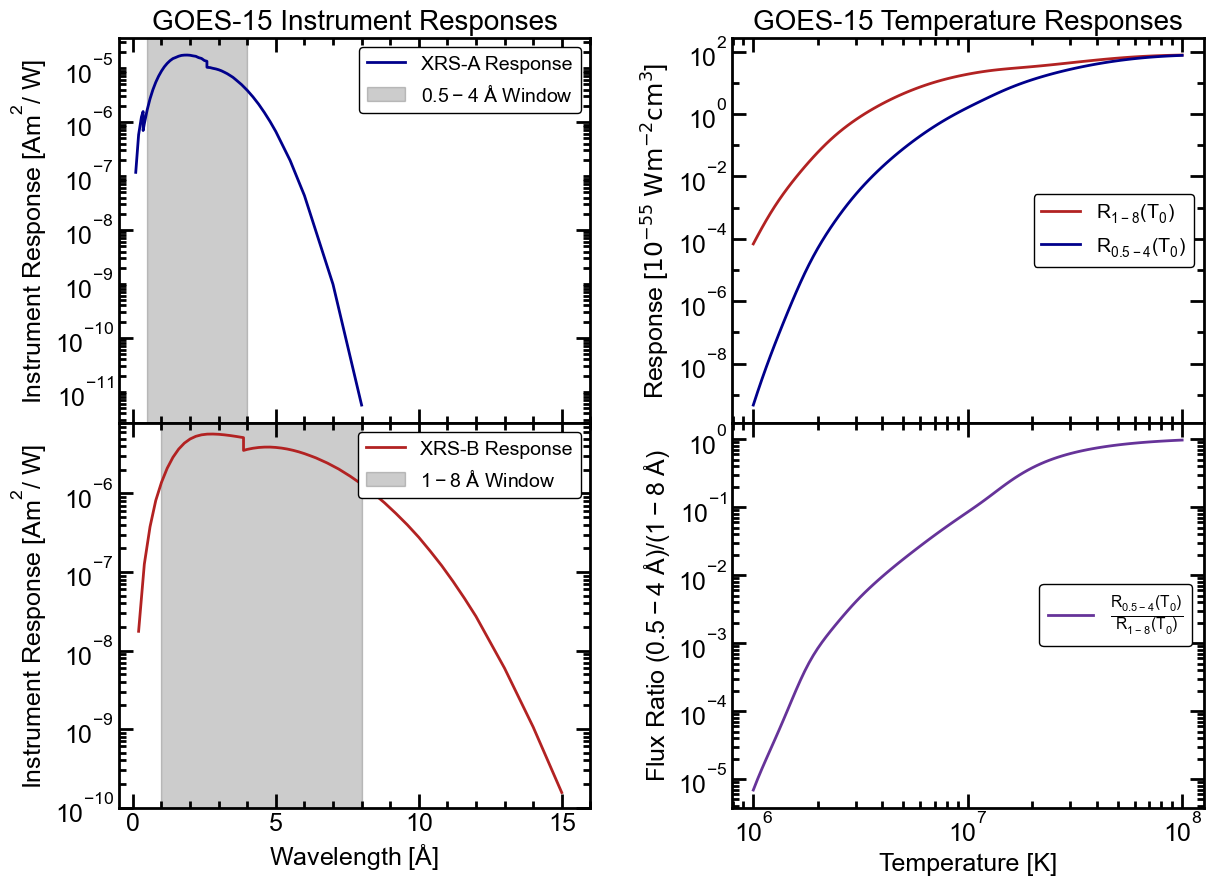

In [41]:
sat = 15
resps_old, resptmk_old = gtem.get_resps(sat=sat,old_ver=True)
resps, resptmk = gtem.get_resps(sat=sat)

# Plot them to see what they look like:
fig= plt.figure(figsize=(14,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0)

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("GOES-15 Instrument Responses", fontsize = 20)
ax1.plot(wavelengths_short, response_short,marker=None,color='darkblue',lw=2,label= 'XRS-A Response')
ax1.axvspan(0.5,4, color = 'black', alpha = 0.2, label = r"$0.5-4\;\AA$ Window")
ax1.set_ylabel("Instrument Response [$A m^{2} / \;W$]")
ax1.set_yscale("log")
ax1.set_xlim([-0.5,16])
ax1.xaxis.set_ticklabels([])
ax1.xaxis.set_major_locator(ticker.AutoLocator())
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_major_locator(ticker.LogLocator())
ax1.yaxis.set_minor_locator(ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax1.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax1.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax1.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax1.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax1.legend(fancybox = True,loc = "upper right", fontsize = 14, framealpha = 1, edgecolor = 'black')


ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(wavelengths_long,response_long, marker=None,color='firebrick',lw=2, label = 'XRS-B Response')
ax2.axvspan(1,8, color = 'black', alpha = 0.2, label = r"$1-8\;\AA$ Window")
ax2.set_xlabel("Wavelength [$\AA$]")
ax2.set_ylabel("Instrument Response [$A m^{2} / \;W$]")
ax2.set_yscale("log")
ax2.set_xlim([-0.5,16])
ax2.set_ylim([1e-10,8e-6])
ax2.xaxis.set_major_locator(ticker.AutoLocator())
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.yaxis.set_major_locator(ticker.LogLocator())
ax2.yaxis.set_minor_locator(ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax2.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax2.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax2.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax2.legend(fancybox = True,loc = "upper right", fontsize = 14, framealpha = 1, edgecolor = 'black')



ax3 = fig.add_subplot(2, 2, 2)
ax3.set_title("GOES-15 Temperature Responses", fontsize = 20)
ax3.plot(1e6*resptmk,resps[:,0],marker=None,color='firebrick',lw=2,label='$R_{1-8}(T_{0})$')
ax3.plot(1e6*resptmk,resps[:,1],marker=None,color='darkblue',lw=2,label='$R_{0.5-4}(T_{0})$')
#ax1.axvspan(5e6, 5e7, color = 'black', alpha = 0.2)
ax3.set_ylabel("Response [$\mathrm{10^{-55}\;Wm^{-2}cm^{3}}$]")
ax3.set_xlabel("Temperature [K]")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.yaxis.set_major_locator(ticker.LogLocator())
ax3.set_yticks([1e-9,1e-7,1e-5,1e-3,1e-1,1e1], minor=True)
ax3.set_yticklabels([], minor = True)
#ax3.yaxis.set_minor_ticks(ticker.LogLocator(base = 10.0, subs = [1, 3, 5, 7], numticks = 4))

ax3.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax3.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax3.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax3.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax3.legend(fancybox = True,loc = "center right", fontsize = 14, framealpha = 1, edgecolor = 'black')

#ax1.grid()
#plt.legend(fancybox = True,title='XRS{:.0f}'.format(sat))

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(1e6*resptmk,resps[:,1]/resps[:,0],marker=None,color='rebeccapurple',lw=2, label = r'$\frac{R_{0.5-4}(T_{0})}{R_{1-8}(T_{0})}$')
#ax2.axvspan(5e6, 5e7, color = 'black', alpha = 0.2)
ax4.set_ylabel("Flux Ratio $(0.5-4\;\AA)$/$(1-8\;\AA)$")
ax4.set_xlabel("Temperature [K]")
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.yaxis.set_major_locator(ticker.LogLocator())
ax4.yaxis.set_minor_locator(ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax4.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax4.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax4.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax4.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax4.legend(fancybox = True,loc = "center right", fontsize = 16, framealpha = 1, edgecolor = 'black')
           
plt.savefig("Presentation_Graphs/Responses.pdf", bbox_inches = 'tight',pad_inches = 0)
plt.show()

## Solar Responses

In [6]:
# # Define the temperature range
# T_range = chiantipy.temperature([1e6, 1e7], temperature_unit='K')

# Define the wavelength range
wvl_range = [0.5, 2.0]

# Define the element
elem = 'Fe'

# Calculate the emission spectrum
em_spectrum = ch.ion(elem, [1e6,1e7], eDensity=1e10, abundance=1.0, ionList=range(1, 11), wvlRange=wvl_range)

# Plot the emission spectrum
em_spectrum.plot()

# Add labels and title to the plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Emission (photons/s/ster/cm^2)')
plt.title(f'Emission spectrum of {elem} for {wvl_range[0]}-{wvl_range[1]} nm at {T_range[0]}-{T_range[1]} K')

# Show the plot
plt.show()


NameError: name 'ch' is not defined